<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/master/Class_06_2_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# BIO 1173: Intro Computational Biology

**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* Part 6.1: Using Convolutional Neural Networks 
* **Part 6.2: Using Pretrained Neural Networks with Keras** 
* Part 6.3: Looking at Keras Generators and Image Augmentation


### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.
  Running the following code will map your GDrive to ```/content/drive```.

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


### Lesson Setup

Run the next code cell to load necessary packages

In [2]:
# You MUST run this code cell first
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import pandas as pd

import os
import shutil
path = '/'
memory = shutil.disk_usage(path)
LESSON_DIRECTORY = os.getcwd()
print("Your LESSON_DIRECTORY is: " + LESSON_DIRECTORY)
print("Disk", memory)
print("Tensorflow version =", (tf.__version__))


Your LESSON_DIRECTORY is: C:\Users\David\BIO1173\Class_06_2
Disk usage(total=4000108531712, used=996296523776, free=3003812007936)
Tensorflow version = 2.10.0


In [3]:
if (tf.test.gpu_device_name()) == '':
    print("WARNING__WARNING_WARNING")
    print("Your computer/laptop does not appear to have GPU acceleration")
    print("You should consider running this lesson in Google COLAB")
else:
    print("Available GPU acceleration =", tf.test.gpu_device_name())

Available GPU acceleration = /device:GPU:0


### Define functions

The cell below creates the function(s) needed for this lesson.

In [4]:
# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [5]:
# Detect Operating System

# Start with WINDOWS flag set to False
WINDOWS = False

if os.name == "nt":
    WINDOWS = True
    print("\nNote: Jupyterlab is running on a WINDOWS computer")
else:
    print("\n Note: Jupyterlab is not running on a WINDOWS computer")


Note: Jupyterlab is running on a WINDOWS computer


In [6]:
# System commands to create a temporary folder called /temp

# Change to LESSON_DIRECTORY
os.chdir(LESSON_DIRECTORY)

# Different commands for different Operating Systems 
if COLAB:
    print("Note: Using COLAB, no /temp folder is needed")
elif WINDOWS: # Windows machine
    os.chdir("..\\")  # move up one level in directory 
    BASE_DIR = os.getcwd() # directory for temp folder
    print("Your temporary folder will be in: " + BASE_DIR)
    try:
        os.mkdir(".\\temp") 
        print(f"Making \\temp in {BASE_DIR}")
    except:
        print(f"Note: \\temp already present in {BASE_DIR}")
    # Change back to LESSON_DIRECTORY
    os.chdir(LESSON_DIRECTORY)
else: # MacOS machine
    os.chdir("../") # move up one level in directory 
    BASE_DIR = os.getcwd()
    print("Your temporary folder will be in: " + BASE_DIR)
    try:
        os.mkdir("./temp")
        print(f"Making /temp in in {BASE_DIR}")
    except:
        print(f"Note: /temp already present in {BASE_DIR}")
    # Change back to LESSON_DIRECTORY
    os.chdir(LESSON_DIRECTORY)
    
#print("Your current working directory is : " + os.getcwd())

Your temporary folder will be in: C:\Users\David\BIO1173
Note: \temp already present in C:\Users\David\BIO1173


# Part 6.2: Transfer Learning for Computer Vision

Many advanced prebuilt neural networks are available for computer vision, and Keras provides direct access to many networks. **_Transfer Learning_** is the technique where you use these prebuilt neural networks. 

There are several different levels of transfer learning.

* Use a prebuilt neural network in its entirety
* Use a prebuilt neural network's structure
* Use a prebuilt neural network's weights

We will begin by using the **_MobileNet_** prebuilt neural network in its entirety. MobileNet will be loaded and allowed to classify simple images. We can already classify 1,000 images through this technique without ever having trained the network.

In [7]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

We begin by downloading weights for a MobileNet trained for the imagenet dataset, which will take some time to download the first time you train the network.

In [8]:
# Download Pre-Trained neural network

model = MobileNet(weights='imagenet',include_top=True)

The loaded network is a Keras neural network. However, this is a neural network that a third party engineered on advanced hardware. Merely looking at the structure of an advanced state-of-the-art neural network can be educational.

In [9]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

Several clues to neural network architecture become evident when examining the above structure.

**_MobileNet_** is a neural network architecture designed for mobile and embedded applications to be computationally efficient. The key components of the MobileNet architecture include depthwise separable convolutions and pointwise convolutions.
* **Depthwise separable convolutions:** MobileNet replaces traditional convolutions with depthwise separable convolutions, which consists of two separate operations: depthwise convolutions and pointwise convolutions. Depthwise convolutions apply a single filter for each input channel, while pointwise convolutions apply 1x1 convolutions to combine the outputs of depthwise convolutions.
* **Pointwise convolutions:** Pointwise convolutions are used to increase the depth of the feature maps while keeping the spatial dimensions the same. This allows for efficient learning of complex patterns while reducing the computational cost.
* **Inverted residuals with linear bottleneck:** MobileNetV2 introduces inverted residuals with linear bottleneck to improve performance. Inverted residuals use an expansion layer to increase the number of channels followed by a depthwise convolution and a projection layer to reduce the number of channels back to the original dimensions.

Overall, the MobileNet architecture is designed to be lightweight and efficient while maintaining high accuracy for a wide range of tasks, making it ideal for deployment on mobile and edge devices.

## Example 1: Use MobileNet to classify images

The code in the cell below creates a two functions that we will need to use classify images using MobileNet. 

* **make_square()** Since MobileNet is designed to classify images with the same number of horizontal and vertical pixels (i.e. a 'square' image), this function uses a combination of padding and cropping to convert any image into a 'square` image.
  
* **classify_image()** This function does most of the work. It first retrives the image from the HTTPS server and resizes it before processing it by the MobileNet model that we previously downloaded. The actual prediction is made by this line of code:

~~~text
  # Use MobileNet model to predict image
  pred = model.predict(x)
~~~

We will now use the MobileNet to classify several image URLs below.  You are encourged to to add additional URLs of your own to see how well the MobileNet can classify.

In [10]:
# Example 1: Use MobileNet to classify images

%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

# Define HTTPS image source 
ROOT = "https://biologicslab.co/BIO1173/images/class_06_2/"

# Function to make sample image square
def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
# Function to classify image
def classify_image(url):
  x = []
  ImageFile.LOAD_TRUNCATED_IMAGES = False

  # Get image from HTTPS server
  response = requests.get(url)

  # Resize the image to 224 x 224 x 3
  img = Image.open(BytesIO(response.content))
  img.load()
  img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.LANCZOS)

  # Additional image processing
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  x = x[:,:,:,:3] # maybe an alpha channel
  
  # Use MobileNet model to predict image
  pred = model.predict(x)

  # Show the image in Jupyterlab/COLAB
  display(img)

  # Print out the image number in MobileNet 
  print(np.argmax(pred,axis=1))

  # Print out MobileNet's first 5 predictions
  lst = decode_predictions(pred, top=5)
  for itm in lst[0]:
      print(itm)


We can now classify an example image.  You can specify the URL of any image you wish to classify.

### Example 1A: Classify images

Our MobileNet model has been trained to recognize a wide range of images. Let's try a few different types of images to get some idea of what MobileNet knows.

Let's start with a picture of Abraham Lincoln. Here is the actual image before being processed:

![___](https://biologicslab.co/BIO1173/images/class_06_2/abraham_lincoln.jpg)

Probably most US school children could correctly identify this image. You should notice that this is _not_ a square image. It is actually 1024 X 576 pixels.

Let's see what happens when we process it and submit the processed image to our model? 

1/1 [==============================] - 1s 844ms/step


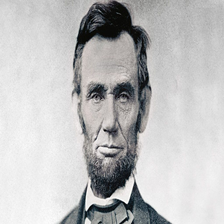

[457]
('n02883205', 'bow_tie', 0.95516807)
('n04350905', 'suit', 0.006228718)
('n03929855', 'pickelhaube', 0.0045834617)
('n03763968', 'military_uniform', 0.003699133)
('n02865351', 'bolo_tie', 0.0030581974)


In [11]:
# Example 1A: 
classify_image(ROOT+"abraham_lincoln.jpg")

Apparently, the creators of MobileNet didn't include images of American presidents in their training set. What MobileNet "saw" wasn't the Lincoln's face, but the clothes he was wearing. MobileNet 'nailed' Lincoln's bow tie with a 95% probability!

We can also see what happens when our code converts a rectangular image (1024 X 576 pixels) into a square image. Lincoln's face is still clearly recognizable albeit a bit 'squashed'. 

### Example 1B: Classify Images

Perhaps MobileNet only recognizes famous people who are currently alive? Let's see how MobileNet does with another former President of the US (POTUS)?


1/1 [==============================] - 0s 22ms/step


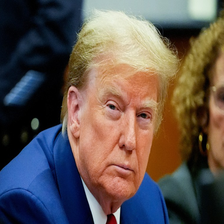

[819]
('n04296562', 'stage', 0.16996644)
('n10148035', 'groom', 0.16193058)
('n04591157', 'Windsor_tie', 0.088305086)
('n02883205', 'bow_tie', 0.086550884)
('n04350905', 'suit', 0.068162285)


In [12]:
# Example 1B: 

classify_image(ROOT+"trump.jpg")

Once again, MobileNet doesn't seem to know the names of American Presidents, but seems to focus more on what the person in the image is wearing.  

### Example 1C: Classify Images

Let's try something else. How about a nice Thompson Submachine gun? This particular image is of a [Lancer Tactical Extra 50 Rounds Airsoft Magazine - Airsoft Tommy Thompson Submachine Gun (2X Drum 2X Stick)](https://us.amazon.com/Lancer-Tactical-Rounds-Airsoft-Magazine/dp/B0C24VRLM1) sold on Amazon in case you might want to buy it. 


1/1 [==============================] - 0s 22ms/step


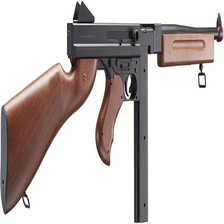

[413]
('n02749479', 'assault_rifle', 0.5354062)
('n04090263', 'rifle', 0.4484019)
('n04086273', 'revolver', 0.010042771)
('n03498962', 'hatchet', 0.0032731625)
('n03109150', 'corkscrew', 0.0010163444)


In [13]:
# Example 1C:

classify_image(ROOT+"submachine_gun.jpg")

Finally, we have one type of image that MobileNet has been trained on. MobileNet predicted that there was an approximately 54% chance that our image of a Thompson Submachine Gun was an 'assault_rife' and a 49% that the image was some kind of 'rifle'. Technically, Thompson Submachine Guns are _not_ considered to be an assault rife or even a rifle, but it wasn't a bad guess.

### Example 1D: Classify images

Let's see how MobileNet does with an image of an American soldier with a _real_ assault rifle, an M16. 

1/1 [==============================] - 0s 21ms/step


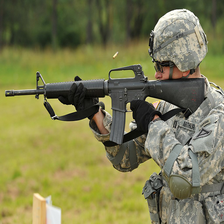

[413]
('n02749479', 'assault_rifle', 0.6508665)
('n04090263', 'rifle', 0.34900758)
('n04086273', 'revolver', 7.64671e-05)
('n03763968', 'military_uniform', 1.4670589e-05)
('n02879718', 'bow', 1.3561797e-05)


In [14]:
# Example 1D: 

classify_image(ROOT+"M16.jpg")

The results are definitely better with a 65% prediction that the image showed an assault rifle, in this case an M16. Again, MobileNet seems to ignore the inclusion of people in an image and focus on inanimate objects in the image. 

## **Exercise 1: Classify images**

For **Exercise 1**, you are present our MobileNet model the following series of 8 animal images. 

1. puffer_fish.jpg (Exercise 1A)
2. king_cobra.jpg (Exercise 1B)
3. monarch_butterfly.jpg (Exercise 1C)
4. viceroy_butterfly.jpg (Exercise 1D)
5. meerkat.jpg (Exercise 1E)
6. paramecium.jpg (Exercise 1F)
7. prairie_dog.jpg (Exercise 1G)
8. great-white-shark.jpg (Exercise 1H)

You will need to make a new code cell for each exercise.

If you are using Jupyter Lab (instead of COLAB), you can add a new code cell by pressing the `+` icon in the toolbar above. 

If your code is correct, you should have received the following output (only the the first value is shown):

1. `puffer_fish.jpg` ('n02655020', 'puffer', 0.99882895)  Note: 99% accurate!
2. `king_cobra.jpg` ('n01748264', 'Indian_cobra', 0.999587) Note: Indian cobras are much smaller than king cobras so technically, MobileNet got this wrong. However, there is no way to know the size of the snake in the image, so we can score this as being 100% accurate.
3. `monarch_butterfly.jpg` ('n02279972', 'monarch', 0.99983335) Note: Nailed it!
4. `viceroy_butterfly.jpg` ('n02279972', 'monarch', 0.9988518) Note: Oops! A total fail, but completely understandable. MobileNet again predicted that there was 100% probability that the picture was a monarch butterfly (_Danaus plexippus_), when in fact it was a viceroy butterfly, a completely different genus and species (_Limenitis archippus_). Of course these two species look very, very similar. The viceroy and the monarch butterflies are [Müllerian mimics](https://en.wikipedia.org/wiki/M%C3%BCllerian_mimicry) of each other. It is certainly possible to train a neural network to do this for example [MonarchNet](https://ai4earthscience.github.io/neurips-2020-workshop/papers/ai4earth_neurips_2020_57.pdf). As will be shown below you could start with the MobileNet as give it additional training to differentiate images of monarchs and viceroys with a high degree of precision.
5. `meerkat.jpg` ('n02138441', 'meerkat', 0.9629027) Note: Not bad! 96% accurate.
6. `paramecium.jpg` ('n01930112', 'nematode', 0.8969467) Note: Not too close. A nematode is round worm such as the common human parasite, the pinworm (_Enterobius_). Apparently, MobileNet wasn't extensively programmed for unicelluar organisms.
7. `prairie_dog.jpg` ('n02361337', 'marmot', 0.93886554) Note: Another fail, but again understandable. [Marmots](https://en.wikipedia.org/wiki/Marmot) genus _Marmota_ are quite similar in appearance to pairie dogs, so we can give a 'pass' to MobileNet for getting these two species confused.
8. `great-white-shark.jpg` ('n01484850', 'great_white_shark', 0.9989716) Note: Nailed it! 100% correct prediction.   

### MobileNet Summary

Overall, our MobileNet neural network did quite well, as long as you picked one of the 1000 image types it supports. For many applications, MobileNet might be entirely acceptable as an image classifier. 

However, if you need to classify very specialized images, like monarch vs viceroy butterflies, or marmots vs prairie dogs --image types supported by imagenet--it is necessary to use **_transfer learning_**.


--------------------------------

## **ResNet vs MobileNet**

MobileNet and ResNet are both popular deep learning architectures, but they have some key differences:

* **Architecture:** MobileNet uses depthwise separable convolutions, which consist of depthwise convolutions and pointwise convolutions, to reduce the computational cost and make the model more efficient for mobile and embedded applications. ResNet, on the other hand, uses residual blocks with skip connections to learn residual mappings for easier training of deep networks.
* **Model size:** MobileNet is known for its lightweight and compact design, making it easy to deploy on mobile devices with limited computational resources. In contrast, ResNet is a deeper network with more parameters, which can lead to higher accuracy but also requires more computational resources.
* **Training complexity:** ResNet can be easier to train compared to MobileNet, especially for deeper architectures, due to the use of skip connections that help with gradient flow and alleviate the vanishing gradient problem.
* **Performance:** ResNet is often used for tasks that require high accuracy, such as image classification on large datasets like ImageNet. MobileNet is designed for efficiency and speed, making it suitable for real-time applications on mobile devices.

Overall, the choice between MobileNet and ResNet depends on the specific requirements of the application, such as computational resources, accuracy goals, and deployment constraints.

----------------------------

## Preparing your computer/lap

In this section, we will train a neural network to count the number of paper clips in images. If you have already completed Class_06_1 using Jupyter Lab (not COLAB) on the computer/laptop that you are using now, you should have already all of the paper clips images stored in a temporary folder, `temp`. 

In class you didn't complete Class_06_1 on the computer/laptop you are using now, or you have deleted these images, the following code will create the necessary folders and download the image data. If these folders have already been created and the image data already downloaded and extracted, you will be informed of this.

### Create temporary folder if necessary

The code in the cell below creates a temporary folder called `temp`. The code is somewhat complicated due to the fact that Windows and MacOS operating systems require slightly different code. 

In [15]:
# Create a temporary folder called /temp

# Change to LESSON_DIRECTORY
os.chdir(LESSON_DIRECTORY)

# Different commands for different Operating Systems 
if COLAB:
    print("Note: Using COLAB, no /temp folder is needed")
elif WINDOWS: # Windows machine
    os.chdir("..\\")  # move up one level in directory 
    BASE_DIR = os.getcwd() # directory for temp folder
    print("Your temporary folder will be in: " + BASE_DIR)
    try:
        os.mkdir(".\\temp") 
        print(f"Making \\temp in {BASE_DIR}")
    except:
        print(f"Note: \\temp already present in {BASE_DIR}")
    # Change back to LESSON_DIRECTORY
    os.chdir(LESSON_DIRECTORY)
else: # MacOS machine
    os.chdir("../") # move up one level in directory 
    BASE_DIR = os.getcwd()
    print("Your temporary folder will be in: " + BASE_DIR)
    try:
        os.mkdir("./temp")
        print(f"Making /temp in in {BASE_DIR}")
    except:
        print(f"Note: /temp already present in {BASE_DIR}")
    # Change back to LESSON_DIRECTORY
    os.chdir(LESSON_DIRECTORY)
    
#print("Your current working directory is : " + os.getcwd())

Your temporary folder will be in: C:\Users\David\BIO1173
Note: \temp already present in C:\Users\David\BIO1173


If you don't already have a temporary folder, the output from the cell above tells you the location of your temporary folder in your filesystem. 

### Set ENVIRONMENTAL VARIABLES

The code in the cell below defines a number of ENVIRONMENTAL VARIABLES that are needed for latter code cells. If you are having any problem with this code, uncomment the print statements are re-run this cell.

In [16]:
# Set ENVIRONMENTAL VARIABLES

URL = "https://biologicslab.co/BIO1173/data/"
DOWNLOAD_SOURCE = URL+"paperclips.zip"
DOWNLOAD_FILE = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
#print("DOWNLOAD_SOURCE=",DOWNLOAD_SOURCE)
#print("DOWNLOAD_FILE=",DOWNLOAD_FILE)

if COLAB:
    PATH = "/content"
    EXTRACT_TARGET = os.path.join(PATH,"clips")
    SOURCE = os.path.join(EXTRACT_TARGET, "paperclips")
    print("Note: You should NOT run this Lesson on COLAB.")
elif WINDOWS:
    PATH=LESSON_DIRECTORY
    # print("PATH=",PATH)
    EXTRACT_FOLDER_IN=BASE_DIR+"\\temp\\"
    #print("EXTRACT_FOLDER_IN=",EXTRACT_FOLDER_IN)
    EXTRACT_FOLDER_OUT=EXTRACT_FOLDER_IN+"clips\\"
    #print("EXTRACT_FOLDER_OUT=",EXTRACT_FOLDER_OUT)
    SOURCE = os.path.join(EXTRACT_FOLDER_IN, "paperclips.zip")
    #print("Note: Using WINDOWS")
    #print("SOURCE=",SOURCE)
    #print("DOWNLOAD_FILE=",DOWNLOAD_FILE)
else:
    PATH=LESSON_DIRECTORY
    print("PATH=",PATH)
    EXTRACT_FOLDER_IN=BASE_DIR+"/temp/"
    #print("EXTRACT_FOLDER_IN=",EXTRACT_FOLDER_IN)
    EXTRACT_FOLDER_OUT=EXTRACT_FOLDER_IN+"clips/"
    #print("EXTRACT_FOLDER_OUT=",EXTRACT_FOLDER_OUT)
    SOURCE = os.path.join(EXTRACT_FOLDER_IN, "paperclips.zip")
    #print("Note: Using OTHER (MacOS?)")
    #print("SOURCE=",SOURCE)
    #print("DOWNLOAD_FILE=",DOWNLOAD_FILE)

print("ENVIROMENTAL VARIABLES were sucessfully created.")

ENVIROMENTAL VARIABLES were sucessfully created.


If your code is correct, you should see the following output:
~~~text
ENVIROMENTAL VARIABLES were sucessfully created.
~~~

### Download and Extract Image Data

The code in the cell below downloads a zip file from the course HTTPS server, `https://biologicslab.co/BIO1173/data`, called `paperclips.zip` and stores this file to your `/temp` folder. The code then extracts (unzips) data in the zip file into a new folder called `/clips`. 

In [17]:
# Download and extract the image data

if COLAB:
    print("Do not run this version on Jupter Lab")
elif WINDOWS:
    import patoolib
    import wget
    DATA_FOLDER=EXTRACT_FOLDER_OUT+"\\paperclips\\"
    if os.path.isfile(SOURCE):
        print("Note: 'paperclips.zip' already downloaded.", SOURCE)
    else:
        !python -m wget {DOWNLOAD_SOURCE} -o {SOURCE} 
    try:
        patoolib.extract_archive(SOURCE,outdir=EXTRACT_FOLDER_OUT)
    except:
        print("Note: File already extracted")
else: # MacOS
    import patoolib
    import wget
    DATA_FOLDER=EXTRACT_FOLDER_OUT+"/paperclips/"
    if os.path.isfile(SOURCE):
        print("Note: 'paperclips.zip' already downloaded.", SOURCE)
    else:
        !wget -v {DOWNLOAD_SOURCE} --output-document={SOURCE}
        try:
            patoolib.extract_archive(SOURCE,outdir=EXTRACT_FOLDER_OUT)
        except:
            print("Note: File already extracted")

Note: 'paperclips.zip' already downloaded. C:\Users\David\BIO1173\temp\paperclips.zip
patool: Extracting C:\Users\David\BIO1173\temp\paperclips.zip ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -oC:\Users\David\BIO1173\temp\clips\ -- C:\Users\David\BIO1173\temp\paperclips.zip
patool:     with creationflags=134217728
Note: File already extracted


If your code is correct and you have already downloaded and extracted the `paperclips.zip` file as part of `Class_06_1`, you should see something similar to the following output:
~~~text
Note: 'paperclips.zip' already downloaded. C:\Users\David\BIO1173\temp\paperclips.zip
patool: Extracting C:\Users\David\BIO1173\temp\paperclips.zip ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -oC:\Users\David\BIO1173\temp\clips\ -- C:\Users\David\BIO1173\temp\paperclips.zip
patool:     with creationflags=134217728
Note: File already extracted
~~~

### Load the Labels for the Training Set

The labels are contained in a CSV file named **train.csv** for the regression. This file has just two labels, **id** and **clip_count**. The ID specifies the filename; for example, row id 1 corresponds to the file **clips-1.jpg**. The following code loads the labels for the training set and creates a new column, named **filename**, that contains the filename of each image, based on the **id** column.

In [18]:
# Load the labels for the training set

import pandas as pd

if COLAB:
    df = pd.read_csv(
        os.path.join(SOURCE,"train.csv"), 
        na_values=['NA', '?'])
    df['filename']="clips-"+df["id"].astype(str)+".jpg"
elif WINDOWS:
    df = pd.read_csv(
    os.path.join(DATA_FOLDER,"train.csv"), 
    na_values=['NA', '?'])
    df['filename']="clips-"+df["id"].astype(str)+".jpg"
else:
    df = pd.read_csv(
    os.path.join(DATA_FOLDER,"train.csv"), 
    na_values=['NA', '?'])
    df['filename']="clips-"+df["id"].astype(str)+".jpg"

This results in the following dataframe.

In [19]:
df

,id,clip_count,filename
0,30001,11,clips-30001.jpg
1,30002,2,clips-30002.jpg
2,30003,26,clips-30003.jpg
3,30004,41,clips-30004.jpg
4,30005,49,clips-30005.jpg
...,...,...,...
19995,49996,35,clips-49996.jpg
19996,49997,54,clips-49997.jpg
19997,49998,72,clips-49998.jpg
19998,49999,24,clips-49999.jpg


If your code is correct you should see the following table:

![___](https://biologicslab.co/BIO1173/images/class_06/class_06_2_df.png)



### Split images into training and validation sets

The code in the cell below, splits the paperclips images into training set and a validation set, with 90% of the images going into the training set. The number images in both sets is printed out.

In [20]:
# Split images into training and validation sets

# create dataframes to data
df_train = pd.read_csv(os.path.join(DATA_FOLDER, "train.csv"))
df_train['filename'] = "clips-" + df_train.id.astype(str) + ".jpg"

TRAIN_PCT = 0.9
TRAIN_CUT = int(len(df_train) * TRAIN_PCT)

df_train_cut = df_train[0:TRAIN_CUT]
df_validate_cut = df_train[TRAIN_CUT:]

print(f"Training size: {len(df_train_cut)}")
print(f"Validate size: {len(df_validate_cut)}")

Training size: 18000
Validate size: 2000


If your code is correct, you should see the following output:
~~~text
Training size: 18000
Validate size: 2000
~~~
We want to use early stopping. To do this, we need a validation set. We will break the data into 80 percent test data and 20 validation. 


## Transfer Learning using `ResNet`
We will make use of the structure of the **_ResNet_** neural network. There are several significant changes that we will make to ResNet to apply to this task. First, ResNet is a classifier; we wish to perform a regression to count. Secondly, we want to change the image resolution that ResNet uses. We will not use the weights from ResNet; changing this resolution invalidates the current weights. Thus, it will be necessary to retrain the network.

Next, we create the generators that will provide the images to the neural network during training. We normalize the images so that the RGB colors between 0-255 become ratios between 0 and 1. We also use the **flow_from_dataframe** generator to connect the Pandas dataframe to the actual image files. We see here a straightforward implementation; you might also wish to use some of the image transformations provided by the data generator.

The **HEIGHT** and **WIDTH** constants specify the dimensions to which the image will be scaled (or expanded). It is probably not a good idea to expand the images.

In [21]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

WIDTH = 256
HEIGHT = 256

training_datagen = ImageDataGenerator(
  rescale = 1./255,
  horizontal_flip=True,
  #vertical_flip=True,
  fill_mode='nearest')

train_generator = training_datagen.flow_from_dataframe(
        dataframe=df_train_cut,
        directory=DATA_FOLDER,
        x_col="filename",
        y_col="clip_count",
        target_size=(HEIGHT, WIDTH),
        # Keeping the training batch size small 
        # USUALLY increases performance
        batch_size=32, 
        class_mode='raw')

validation_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = validation_datagen.flow_from_dataframe(
        dataframe=df_validate_cut,
        directory=DATA_FOLDER,
        x_col="filename",
        y_col="clip_count",
        target_size=(HEIGHT, WIDTH),
        # Make the validation batch size as large as you 
        # have memory for
        batch_size=256, 
        class_mode='raw')

Found 18000 validated image filenames.
Found 2000 validated image filenames.


If your code is correct, you should see the following output:
~~~text
Found 18000 validated image filenames.
Found 2000 validated image filenames.
~~~
This means that our train and validation generator are working properly and know where to find where in your filesystem your images of paperclips are stored.

### Example 2: Transfer Learning with ResNet

We will now use a ResNet neural network as a basis for our neural network. We will redefine both the input shape and output of the ResNet model, so we will not transfer the weights. Since we redefine the input, the weights are of minimal value. We begin by loading, from Keras, the ResNet50 network. We specify **include_top** as False because we will change the input resolution. We also specify **weights** as false because we must retrain the network after changing the top input layers.

### Example 2: Step 1 - Redefine the input shape

The first modification of the base ResNet model `ResNet50` that we need to make is to redefine the image shape to 256 X 256 pixels. 

In [22]:
# Example 2: Step 1 - Redefine the input shape

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input

# Set variables
HEIGHT = 256
WIDTH = 256

input_tensor = Input(shape=(HEIGHT, WIDTH, 3))

base_model = ResNet50(
    include_top=False, weights=None, input_tensor=input_tensor,
    input_shape=None)

### Example 2: Step 2 - Add layers to convert model to regression

Now we must add a few layers to the end of the neural network so that it becomes a regression model. As you should expect for a regression model, there is only a single neuron in the output layer:
~~~text
model=Model(inputs=base_model.input,outputs=Dense(1)(x))
~~~

In [23]:
# Example 2: Step 2 - Add layers to convert model to regression

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
model=Model(inputs=base_model.input,outputs=Dense(1)(x))


### Example 2: Step 3 - Train the model

In the cell below, we provide **_additional_** training to the base `ResNet50` model by "showing it" 16200 test images with their labels (i.e. how many paperclips are in the image) using a 1800 validation image set to allow us to have EarlyStopping. 

Training is like before. However, we do not define the entire neural network here.

In [24]:
# Example 2: Step 3 - Train the model
import time

# Set variables
EPOCHS=50

start_time=time.time()

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

# Important, calculate a valid step size for the validation dataset
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size

model.compile(loss = 'mean_squared_error', optimizer='adam', 
              metrics=[RootMeanSquaredError(name="rmse")])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
        patience=50, verbose=1, mode='auto',
        restore_best_weights=True)

history = model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=250, 
                    validation_data = val_generator, callbacks=[monitor],
                    verbose = 1, validation_steps=STEP_SIZE_VALID)

# Print elapsed time
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/50
250/250 [==============================] - 60s 212ms/step - loss: 68.9655 - rmse: 8.3045 - val_loss: 1795.0043 - val_rmse: 42.3675
Epoch 2/50
250/250 [==============================] - 83s 334ms/step - loss: 36.6780 - rmse: 6.0562 - val_loss: 465.5146 - val_rmse: 21.5758
Epoch 3/50
250/250 [==============================] - 109s 435ms/step - loss: 18.9142 - rmse: 4.3491 - val_loss: 115.6487 - val_rmse: 10.7540
Epoch 4/50
250/250 [==============================] - 161s 646ms/step - loss: 14.6478 - rmse: 3.8272 - val_loss: 101.7916 - val_rmse: 10.0892
Epoch 5/50
250/250 [==============================] - 145s 583ms/step - loss: 16.2657 - rmse: 4.0331 - val_loss: 383.8610 - val_rmse: 19.5924
Epoch 6/50
250/250 [==============================] - 145s 583ms/step - loss: 11.3100 - rmse: 3.3630 - val_loss: 438.7896 - val_rmse: 20.9473
Epoch 7/50
250/250 [==============================] - 146s 584ms/step - loss: 8.8091 - rmse: 2.9680 - val_loss: 357.4334 - val_rmse: 18.9059
Epoch 8/

Training will require a significant amount of time. On my Windows machine with an NVIDIA graphics card, it required more than 1 hour to complete all 50 epochs. (EarlyStopping did not kick in). 

Here is the output from the final epoch:
~~~text
Epoch 50/50
250/250 [==============================] - 53s 210ms/step - loss: 1.8719 - rmse: 1.3682 - val_loss: 79.4273 - val_rmse: 8.9122
Elapsed time: 1:27:50.52
~~~

If we wanted to,  we could zip-up the preprocessed files and store them somewhere for later use if we needed a trained neural neural network to count the number of paperclips on a piece of paper. 


## **Lesson Turn-in**

When you have completed all of the code cells, and run them in sequential order (the last code cell should be number 32) use the **File --> Print.. --> Save to PDF** to generate a PDF of your JupyterLab notebook. Save your PDF as `Class_06_2.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.